## Marshall Mix Design Module 

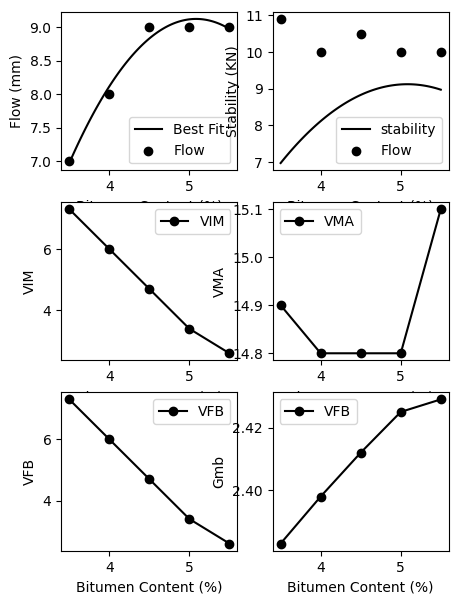

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Aggregate Properties 
Agg_Size = ['Retained 12.5mm','Retained 9.5mm','Retained 4.75 mm','Crush Dust','Sand','Mineral Filler (eg. Cement)']
Percentage_Weight_of_total_agg = [5,10,25,48,10,2]
Bulk_Specific_Gravity = [2.727,2.731,2.732,2.691,2.584,3.120] # Bulk Specific gravity of Aggregate 
Gmb = [2.383, 2.398,2.412,2.425,2.429]
Pb = [3.5,4.0,4.5,5.0,5.5]
Gsb = 2.703                                 # Composite specif gravity of the total aggregate 
Gb = 1.03                                   # Specific gravity of binder
Gmm = [2.570, 2.550, 2.531, 2.511, 2.493]   # Maximum theoretical specific gravity per binder content   
Pba = 0.2                                   # Bitumen absorption (Pba = 0.2%)
Pbe = 3.8                                   # Effective bitumen content (Pbe = 0.38%)

 # Create a DataFrame for aggregate Properties 
Agg_Properties = pd.DataFrame({"Aggregates Size": Agg_Size, "Percentage By Weight of Total Agg": Percentage_Weight_of_total_agg,
             "Bulk Specific Gravity": Bulk_Specific_Gravity})



# Function to compute Volumetric Properties 
def compute_volumetrics(Gmb,Gmm,Pb):
    VIM = ((Gmm-Gmb)/Gmm)*100                # Voids in total Mix 
    VMA = 100-((Gmb/Gsb)*(100 - Pb))      # Voids in Mineral Aggregate
    VFM = ((VMA-VIM)/VMA)*100                # Voids Filled with Asphalt 
    return round(VIM,1) ,round(VMA,1), round(VFM,1)

# Marshall Stabilty and Flow Test Results 
stability_values = [10.9,10.0,10.5,10.0,10.0] # KN
flow_values = [7,8,9,9,9]                     # mm

# Compute Volumetric Properties 
results = []
for i, binder in  enumerate(Pb):
    VIM, VMA, VFM = compute_volumetrics(Gmb[i], Gmm[i], binder)
    results.append([binder, Gmb[i], Gmm[i], VIM, VMA, VFM, stability_values[i], flow_values[i]])
    
# Create a DataFrame for the results
df = pd.DataFrame(results, columns = ['Bitumen Content (%)',
                                      'Bulk SG of the Specimen (Gmb)',
                                      'Maximum SG of the loose mix Gmm',
                                      'VIM (%)',
                                      'VMA (%)',
                                      'VFM (%)',
                                      'Stability (KN)',
                                      'Flow (mm)'])

# Visualization Using Polynomial Fit
fig, ax = plt.subplots(nrows = 3,
                       ncols = 2,
                       figsize = (5,7))



# Subplot 1: Bitumen Content and Flow 
coeffs = np.polyfit(df['Bitumen Content (%)'], df['Flow (mm)'], 2)  # 2nd-degree polynomial fit
poly_eq = np.poly1d(coeffs)
x_1 = np.linspace(df['Bitumen Content (%)'].min(), df['Bitumen Content (%)'].max(), 100)
y_1 = poly_eq(x_1)

ax[0,0].plot(x_1, y_1, 'k-', label='Best Fit')  # Smooth curve
ax[0,0].scatter(df['Bitumen Content (%)'], df['Flow (mm)'], color='black', label='Flow')  # Keep original points
ax[0,0].set_xlabel('Bitumen Content (%)')
ax[0,0].set_ylabel('Flow (mm)')
ax[0,0].legend()


# Subplot 2_Bitumen Content and Stability
coeffs = np.polyfit(df['Bitumen Content (%)'], df['Stability (KN)'], 2)
poly_enq = np.poly1d(coeffs)
x_2 = np.linspace(df['Bitumen Content (%)'].min(), df['Bitumen Content (%)'].max(), 100)
y_2 = poly_eq(x_2)


ax[0,1].plot(x_2, y_2, 'k-', label = 'stability') # Smooth  curve
ax[0,1].scatter(df['Bitumen Content (%)'],df['Stability (KN)'], color ='black', label = 'Flow')
ax[0,1].set_xlabel('Bitumen Content (%)')
ax[0,1].set_ylabel('Stability (KN)')
ax[0,1].legend()

# Subplot 3_ Bitumen Content and VIM 
ax[1,0].plot(df['Bitumen Content (%)'], df['VIM (%)'], 'ko-', label = 'VIM')
ax[1,0].set_xlabel('Bitumen Content (%)')
ax[1,0].set_ylabel('VIM')
ax[1,0].legend()

# Subplot 4_ Bitumen Content and VMA
ax[1,1].plot(df['Bitumen Content (%)'], df['VMA (%)'], 'ko-', label = 'VMA')
ax[1,1].set_xlabel('Bitumen Content (%)')
ax[1,1].set_ylabel('VMA')
ax[1,1].legend()

# Subplot 5_Bitumen Content and VFB
ax[2,0].plot(df['Bitumen Content (%)'], df['VIM (%)'], 'ko-', label = 'VFB')
ax[2,0].set_xlabel('Bitumen Content (%)')
ax[2,0].set_ylabel('VFB')
ax[2,0].legend()

# Subplot 6_ Bitumen Content and Maximum SG of the loose mix Gmb
ax[2,1].plot(df['Bitumen Content (%)'], df['Bulk SG of the Specimen (Gmb)'], 'ko-', label = 'VFB')
ax[2,1].set_xlabel('Bitumen Content (%)')
ax[2,1].set_ylabel('Gmb')
ax[2,1].legend()





In [36]:
df

,Bitumen Content (%),Bulk SG of the Specimen (Gmb),Maximum SG of the loose mix Gmm,VIM (%),VMA (%),VFM (%),Stability (KN),Flow (mm)
0,3.5,2.383,2.570,7.3,14.9,51.2,10.9,7
1,4.0,2.398,2.550,6.0,14.8,59.8,10.0,8
2,4.5,2.412,2.531,4.7,14.8,68.2,10.5,9
3,5.0,2.425,2.511,3.4,14.8,76.8,10.0,9
4,5.5,2.429,2.493,2.6,15.1,83.0,10.0,9


In [30]:
Agg_Properties

,Aggregates Size,Percentage By Weight of Total Agg,Bulk Specific Gravity
0,Retained 12.5mm,5,2.727
1,Retained 9.5mm,10,2.731
2,Retained 4.75 mm,25,2.732
3,Crush Dust,48,2.691
4,Sand,10,2.584
5,Mineral Filler (eg. Cement),2,3.120


In [48]:
poly_eq


poly1d([ -0.85714286,   8.71428571, -13.02857143])